# HW#3
HW#3의 각 문항에 대한 실행 코드 블록을 이전 과제들과 동일한 방법으로 작성하시기 바랍니다.

A. Smoothing

A-1. Gaussian kernel

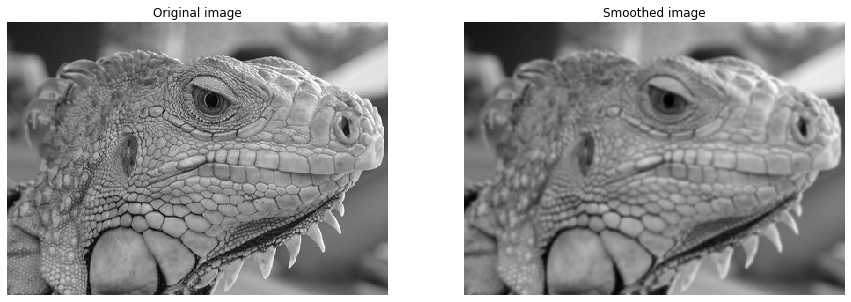

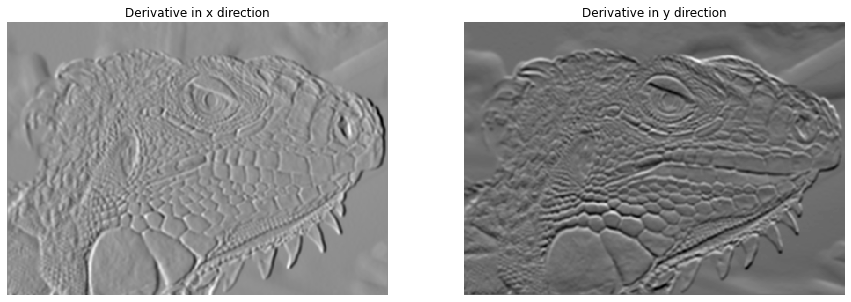

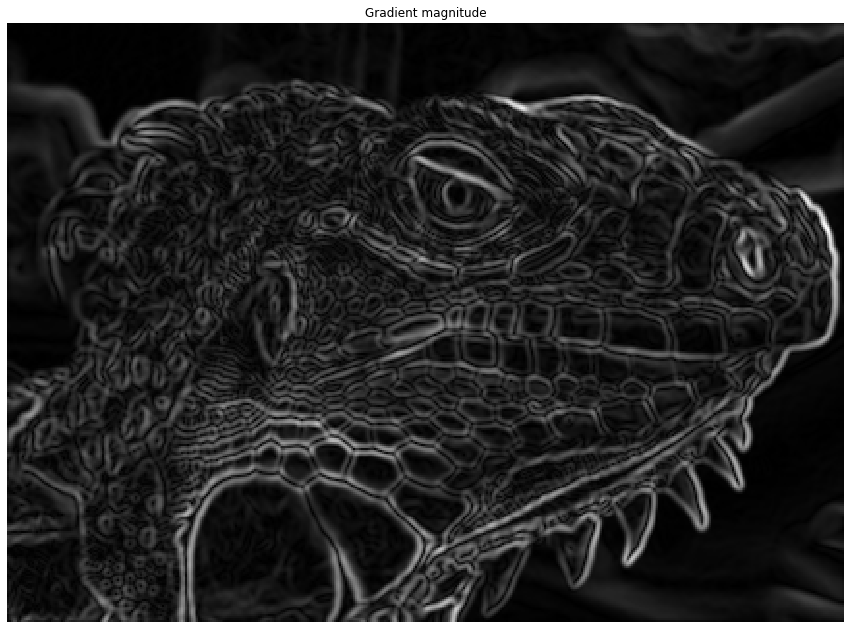

Thetas: 0
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Thetas: 45
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Thetas: 90
[[0.  0.  0. ]
 [0.  0.5 0. ]
 [0.  0.  0. ]]
Thetas: 135
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


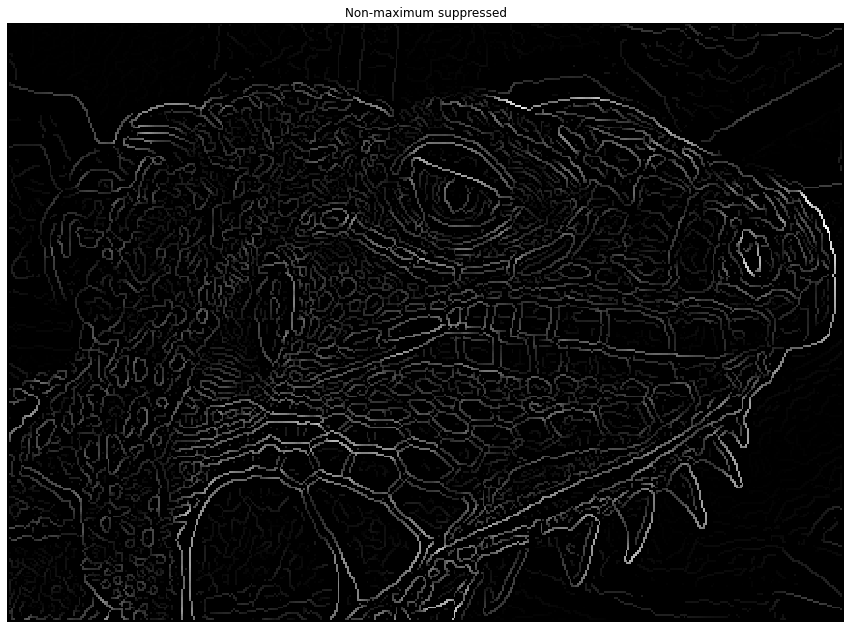

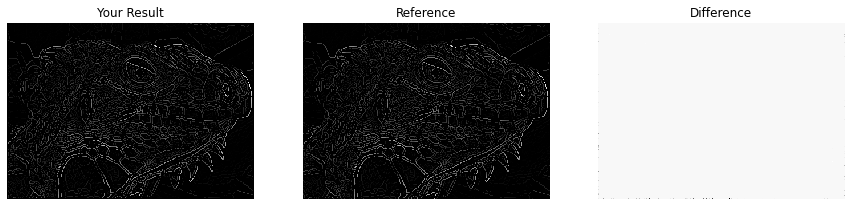

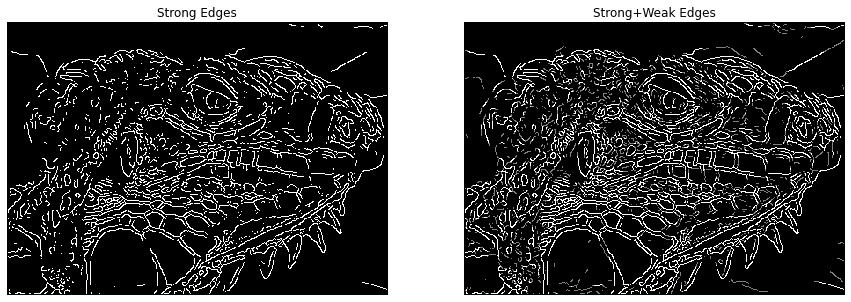

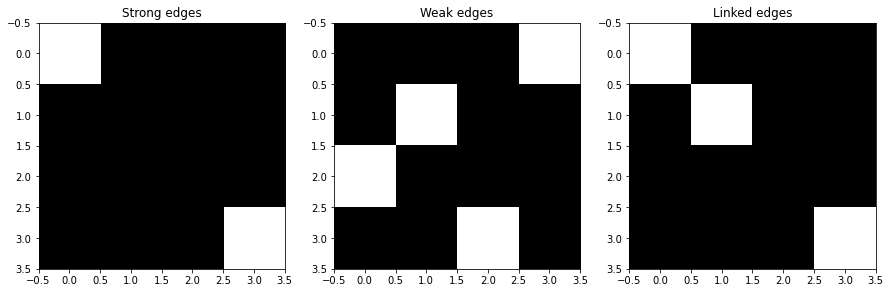

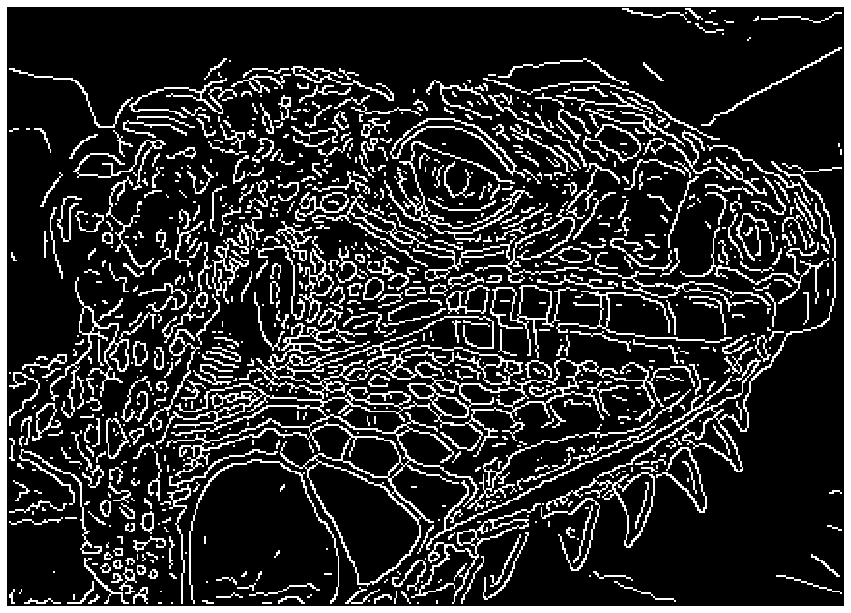

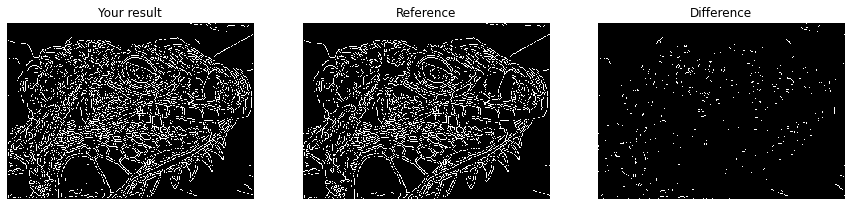

(310, 433)


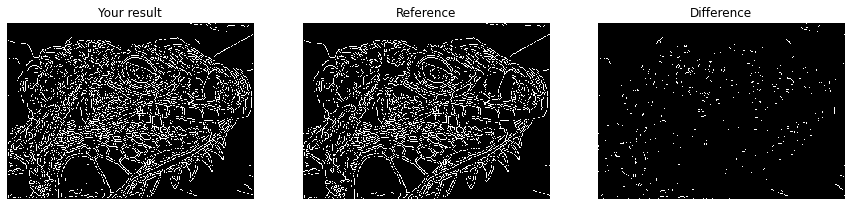

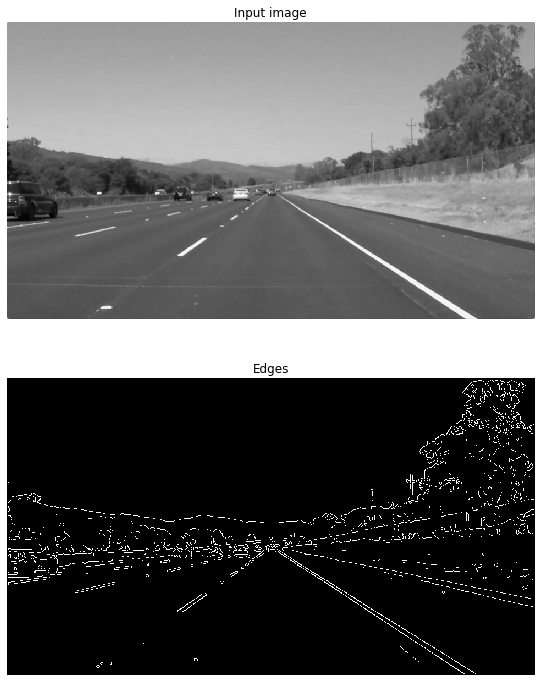

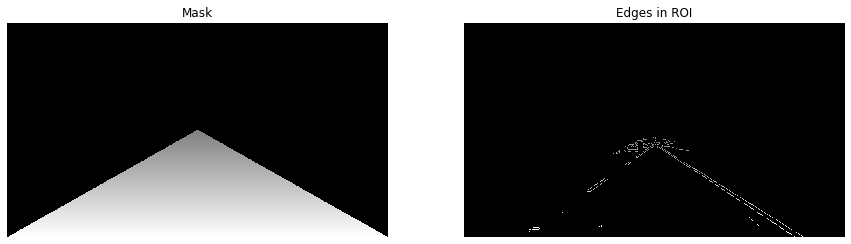

1102


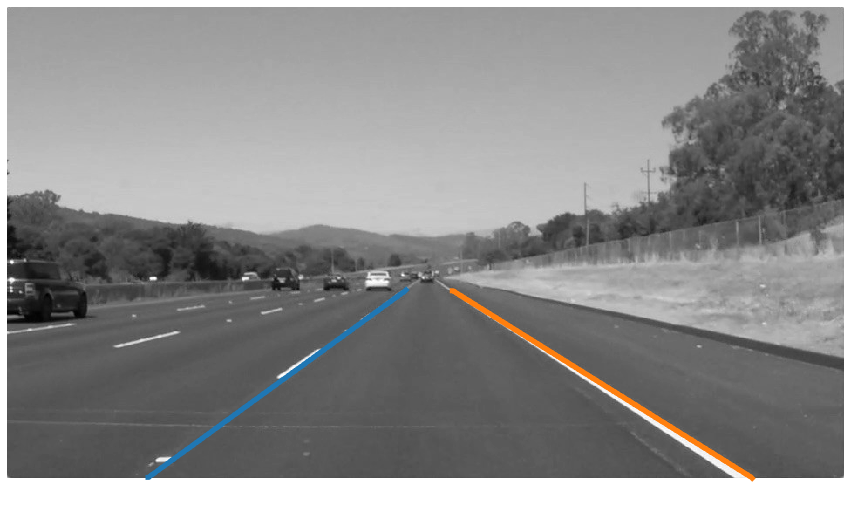

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import io

plt.rcParams['figure.figsize'] = (15.0, 12.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

from edge import conv, gaussian_kernel

#   Define 3x3 Gaussian kernel with std = 1
kernel = gaussian_kernel(3, 1)
kernel_test = np.array(
    [[0.05854983, 0.09653235, 0.05854983],
    [0.09653235, 0.15915494, 0.09653235],
    [0.05854983, 0.09653235, 0.05854983]]
)
#   Test Gaussian kernel
if not np.allclose(kernel, kernel_test):
    print('Incorrect values! Please check your implementation')

A-2. conv implementaion

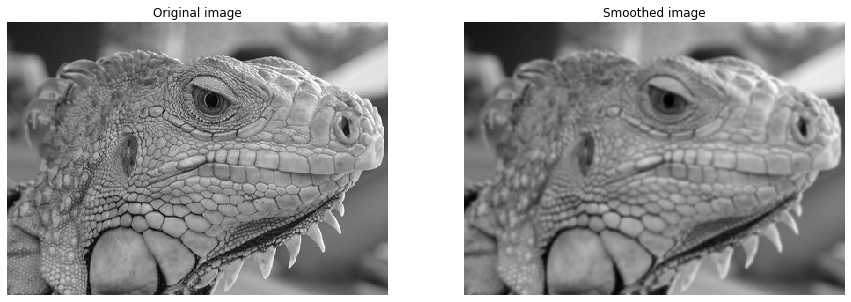

In [2]:
from edge import conv, gaussian_kernel
from matplotlib import pyplot as plt
from skimage import io

#   Test with different kernel_size and sigma
kernel_size = 5
sigma = 1.4

#   Load image
img = io.imread('iguana.png', as_gray=True)

#   Define 5x5 Gaussian kernel with std = sigma
kernel = gaussian_kernel(kernel_size, sigma)

#   Convolve image with kernel to achieve smoothed effect
smoothed = conv(img, kernel)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(smoothed)
plt.title('Smoothed image')
plt.axis('off')

plt.show()

A-3.

sigma를 증가시키면 smoothing 효과가 강해지고, kernel_size를 키우면 타겟 픽셀에 영향을 주는 픽셀들의 범위가 넓어집니다.

B

B-1. Implement partial_x, partial_y

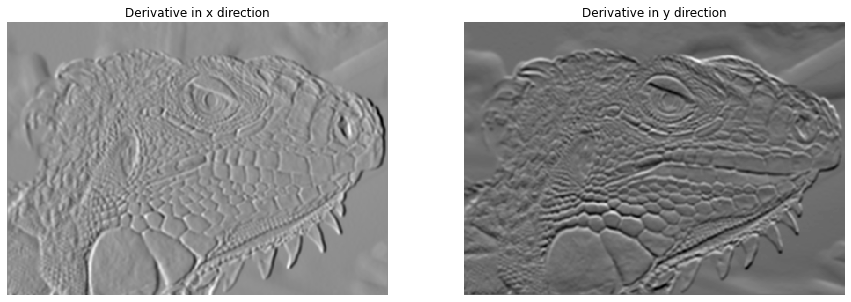

In [3]:
import numpy as np
from edge import partial_x, partial_y

#   Test input
I = np.array(
    [[0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]]
)

#   Expected outputs
I_x_test = np.array(
    [[0, 0, 0],
    [0.5, 0, -0.5],
    [0, 0, 0]]
)

I_y_test = np.array(
    [[0, 0.5, 0],
    [0, 0, 0],
    [0, -0.5, 0]]
)

#   Compute partial derivatives
I_x = partial_x(I)
I_y = partial_y(I)

#   Test correctness of partial_x and partial_y
if (not np.all(I_x == I_x_test)):
    print('partial_x incorrect')

if (not np.all(I_y == I_y_test)):
    print('partial_y incorrect')
    
#   Test with different kernel_size and sigma
kernel_size = 5
sigma = 1.4

#   Load image
img = io.imread('iguana.png', as_gray=True)

#   Define 5x5 Gaussian kernel with std = sigma
kernel = gaussian_kernel(kernel_size, sigma)

#   Convolve image with kernel to achieve smoothed effect
smoothed = conv(img, kernel)

#   Compute parital derivatives of smoothed image
Gx = partial_x(smoothed)
Gy = partial_y(smoothed)

plt.subplot(1, 2, 1)
plt.imshow(Gx)
plt.title('Derivative in x direction')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(Gy)
plt.title('Derivative in y direction')
plt.axis('off')

plt.show()

B-2.

이미지의 노이즈 때문에 gradient 결과값이 왜곡될 수 있기 때문입니다.

B-3. Implement gradient

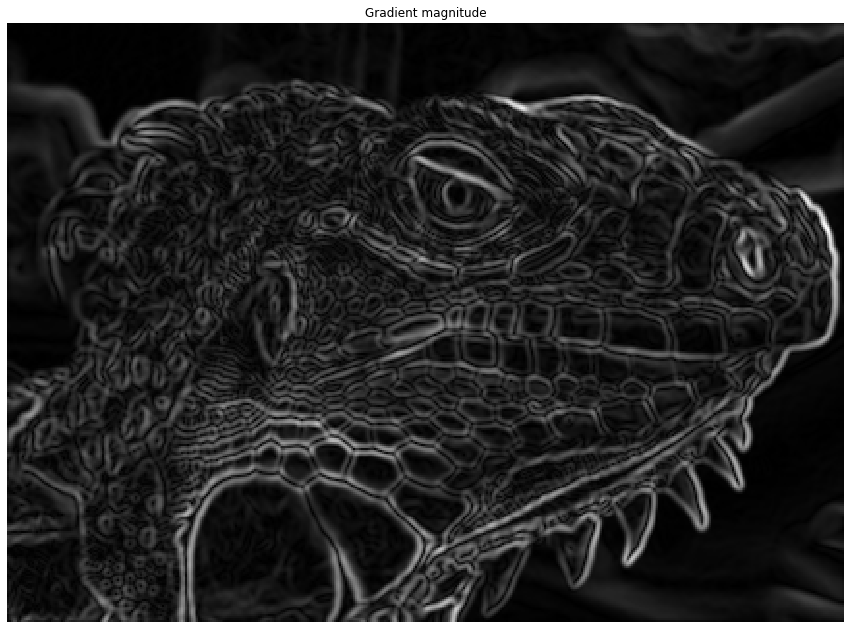

In [4]:

from matplotlib import pyplot as plt
from skimage import io
from edge import gradient


#   Test with different kernel_size and sigma
kernel_size = 5
sigma = 1.4

#   Load image
img = io.imread('iguana.png', as_gray=True)

#   Define 5x5 Gaussian kernel with std = sigma
kernel = gaussian_kernel(kernel_size, sigma)

#   Convolve image with kernel to achieve smoothed effect
smoothed = conv(img, kernel)

G, theta = gradient(smoothed)

if (not np.all(G >= 0)):
    print('Magnitude of gradients should be non-negative')

if (not np.all((theta >= 0) * (theta < 360))):
    print('Direction of gradients should be in range 0 <= theta < 360')

plt.imshow(G)
plt.title('Gradient magnitude')
plt.axis('off')
plt.show()


C. Non-maximum supression

Thetas: 0
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Thetas: 45
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Thetas: 90
[[0.  0.  0. ]
 [0.  0.5 0. ]
 [0.  0.  0. ]]
Thetas: 135
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


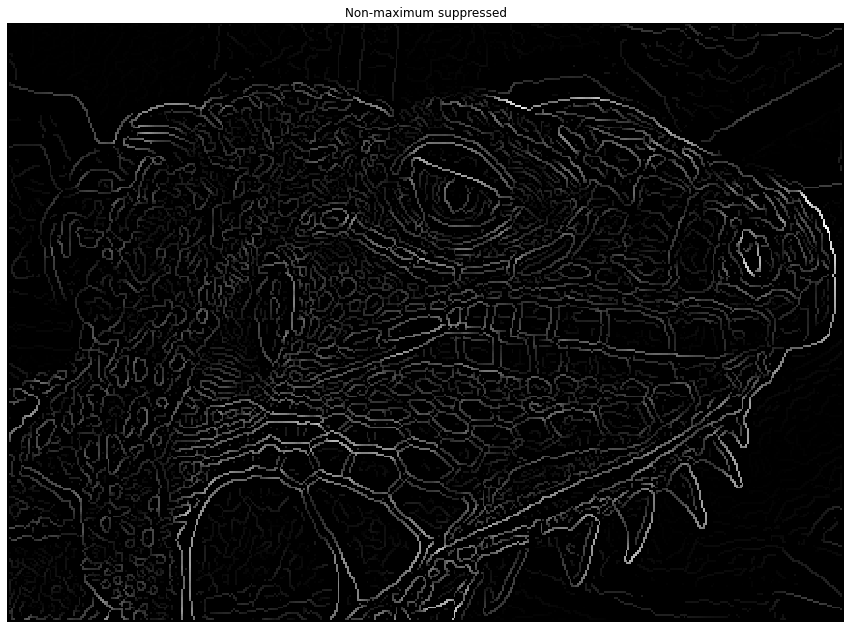

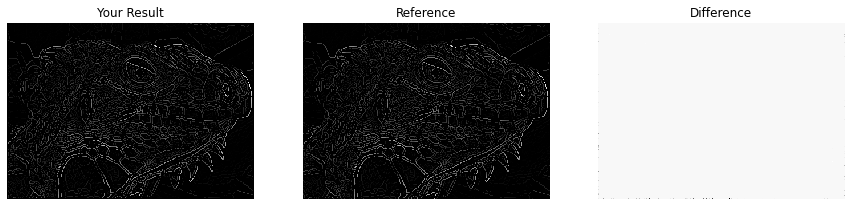

In [5]:
from edge import non_maximum_suppression, gaussian_kernel, gradient, conv

#   Test with different kernel_size and sigma
kernel_size = 5
sigma = 1.4

#   Load image
img = io.imread('iguana.png', as_gray=True)

#   Define 5x5 Gaussian kernel with std = sigma
kernel = gaussian_kernel(kernel_size, sigma)

#   Convolve image with kernel to achieve smoothed effect
smoothed = conv(img, kernel)

G, theta = gradient(smoothed)

#   Test input
g = np.array(
    [[0.4, 0.5, 0.6],
    [0.3, 0.5, 0.7],
    [0.4, 0.5, 0.6]]
)

#   Print out non-maximum suppressed output
#   Varying theta
for angle in range(0, 180, 45):
    print('Thetas:', angle)
    t = np.ones((3, 3)) * angle
    print(non_maximum_suppression(g, t))

nms = non_maximum_suppression(G, theta)
plt.imshow(nms)
plt.title('Non-maximum suppressed')
plt.axis('off')
plt.show()

plt.subplot(1, 3, 1)
plt.imshow(nms)
plt.axis('off')
plt.title('Your Result')

plt.subplot(1, 3, 2)
reference = np.load('references/iguana_non_max_suppressed.npy')
plt.imshow(reference)
plt.axis('off')
plt.title('Reference')

plt.subplot(1, 3, 3)
plt.imshow(nms - reference)
plt.title('Difference')
plt.axis('off')
plt.show()

D. Implement double_threshold

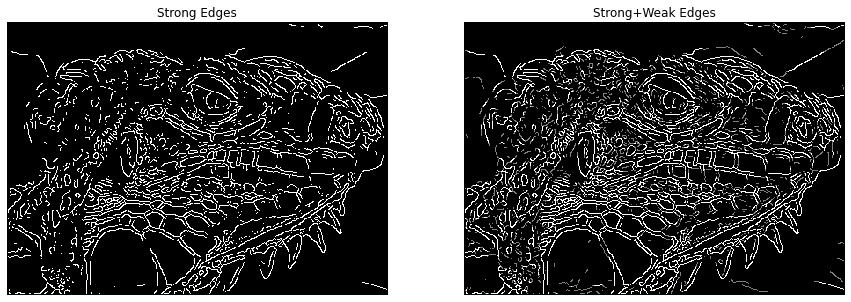

In [6]:
import numpy as np

def non_maximum_suppression(G, theta):
    H, W = G.shape
    out = np.zeros((H, W))

    # Round the gradient direction to the nearest 45 degrees
    theta = np.floor((theta + 22.5) / 45) * 45

    ### BEGIN YOUR CODE
    for i in range(1, H-1):
        for j in range(1, W-1):
            ang = int(theta[i][j]%360)
            if (ang%180 == 0):
                l = [G[i][j-1], G[i][j+1]]
            elif (ang%180 == 45):
                l = [G[i-1][j-1], G[i+1][j+1]]
            elif (ang%180 == 90):
                l = [G[i-1][j], G[i+1][j]]
            elif (ang%180 == 135):
                l = [G[i-1][j+1], G[i+1][j-1]]
            if G[i,j] >= np.max(l):
                out[i,j] = G[i,j]
            else:
                out[i, j] = 0
    ### END YOUR CODE

    return out

def double_thresholding(img, high, low):
    """
    Args:
        img: numpy array of shape (H, W) representing NMS edge response.
        high: high threshold(float) for strong edges.
        low: low threshold(float) for weak edges.

    Returns:
        strong_edges: Boolean array representing strong edges.
            Strong edeges are the pixels with the values greater than
            the higher threshold.
        weak_edges: Boolean array representing weak edges.
            Weak edges are the pixels with the values smaller or equal to the
            higher threshold and greater than the lower threshold.
    """

    strong_edges = np.zeros(img.shape, dtype=np.bool)
    weak_edges = np.zeros(img.shape, dtype=np.bool)

    ### YOUR CODE HERE
    strong_edges = img > high
    weak_edges = (img < high) & (img > low)

    ### END YOUR CODE

    return strong_edges, weak_edges

from edge import non_maximum_suppression, double_thresholding

#   Test with different kernel_size and sigma
kernel_size = 5
sigma = 1.4

#   Load image
img = io.imread('iguana.png', as_gray=True)

#   Define 5x5 Gaussian kernel with std = sigma
kernel = gaussian_kernel(kernel_size, sigma)

#   Convolve image with kernel to achieve smoothed effect
smoothed = conv(img, kernel)

G, theta = gradient(smoothed)

nms = non_maximum_suppression(G, theta)

low_threshold = 0.02
high_threshold = 0.03

strong_edges, weak_edges = double_thresholding(nms, high_threshold, low_threshold)
assert(np.sum(strong_edges & weak_edges) == 0)

edges = strong_edges * 1.0 + weak_edges * 0.5

plt.subplot(1, 2, 1)
plt.imshow(strong_edges)
plt.title('Strong Edges')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges)
plt.title('Strong+Weak Edges')
plt.axis('off')

plt.show()

E. Implement get_neighbors, link_edges

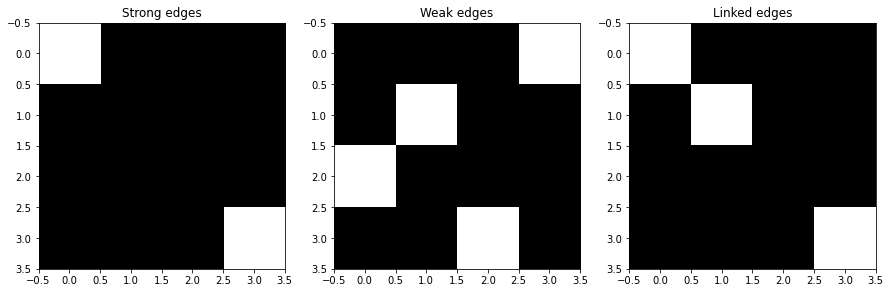

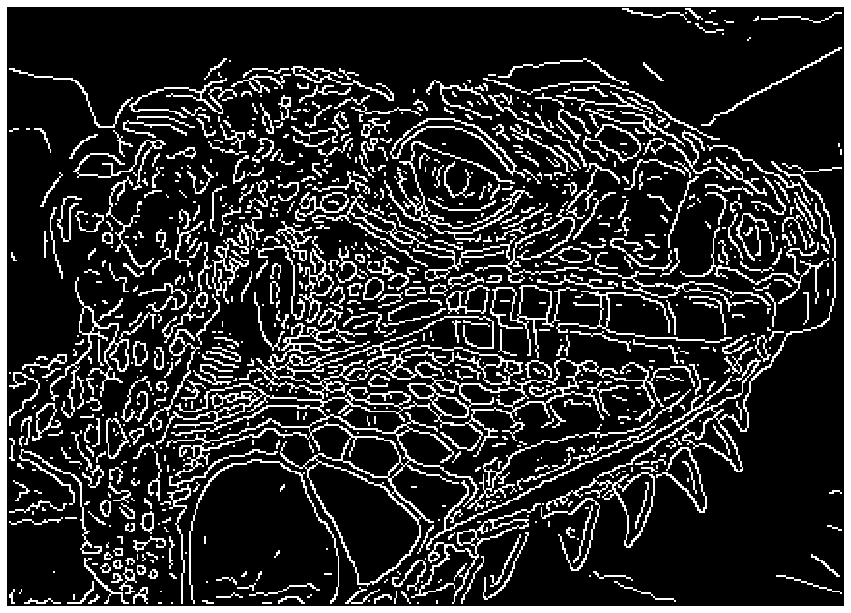

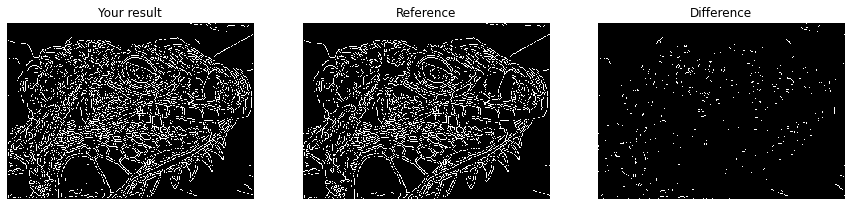

In [7]:
from edge import get_neighbors, link_edges

test_strong = np.array(
    [[1, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 1]],
    dtype=np.bool
)

test_weak = np.array(
    [[0, 0, 0, 1],
    [0, 1, 0, 0],
    [1, 0, 0, 0],
    [0, 0, 1, 0]],
    dtype=np.bool
)

test_linked = link_edges(test_strong, test_weak)

plt.subplot(1, 3, 1)
plt.imshow(test_strong)
plt.title('Strong edges')

plt.subplot(1, 3, 2)
plt.imshow(test_weak)
plt.title('Weak edges')

plt.subplot(1, 3, 3)
plt.imshow(test_linked)
plt.title('Linked edges')
plt.show()

edges = link_edges(strong_edges, weak_edges)

plt.imshow(edges)
plt.axis('off')
plt.show()

plt.subplot(1, 3, 1)
plt.imshow(edges)
plt.axis('off')
plt.title('Your result')

plt.subplot(1, 3, 2)
reference = np.load('references/iguana_edge_tracking.npy')
plt.imshow(reference)
plt.axis('off')
plt.title('Reference')

plt.subplot(1, 3, 3)
plt.imshow(edges ^ reference)
plt.title('Difference')
plt.axis('off')
plt.show()

F. Canny edge detector

(310, 433)


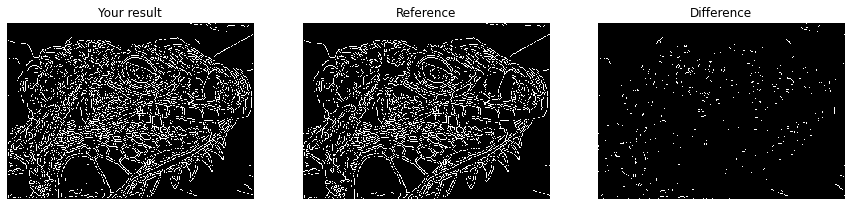

In [8]:

from edge import canny

#   Load image
img = io.imread('iguana.png', as_gray=True)


#   Run Canny edge detector
edges = canny(img, kernel_size=5, sigma=1.4, high=0.03, low=0.02)
print(edges.shape)

plt.subplot(1, 3, 1)
plt.imshow(edges)
plt.axis('off')
plt.title('Your result')

plt.subplot(1, 3, 2)
reference = np.load('references/iguana_canny.npy')
plt.imshow(reference)
plt.axis('off')
plt.title('Reference')

plt.subplot(1, 3, 3)
plt.imshow(edges ^ reference)
plt.title('Difference')
plt.axis('off')
plt.show()

2. A

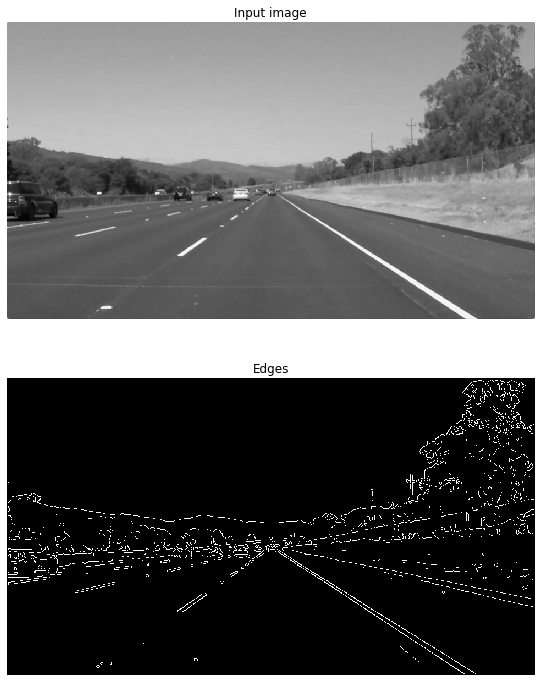

In [9]:

from edge import canny

#   Load image
img2 = io.imread('road.jpg', as_gray=True)

#   Run canny edge detector
edges = canny(img2, kernel_size=5, sigma=1.4, high=0.03, low=0.02)

plt.subplot(211)
plt.imshow(img2)
plt.axis('off')
plt.title('Input image')

plt.subplot(212)
plt.imshow(edges)
plt.axis('off')
plt.title('Edges')
plt.show()


2.B

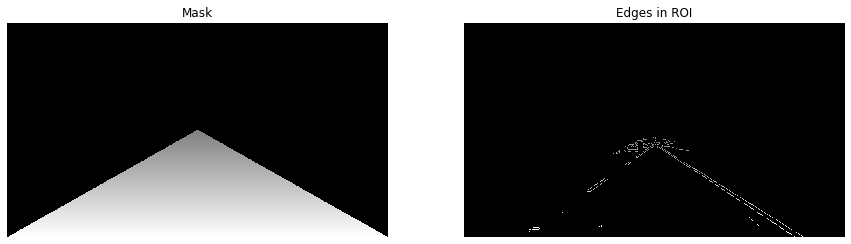

In [10]:

H, W = img2.shape

#   Generate mask for ROI(Region of Interest)
mask = np.zeros((H, W))
for i in range(H):
    for j in range(W):
        if (i>(H/W) * j and i > -(H/W) * j + H):
            mask[i, j] = i

#   Extract edges in ROI
roi = edges * mask

plt.subplot(1, 2, 1)
plt.imshow(mask)
plt.title('Mask')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(roi)
plt.title('Edges in ROI')
plt.axis('off')
plt.show()

2.C

1102


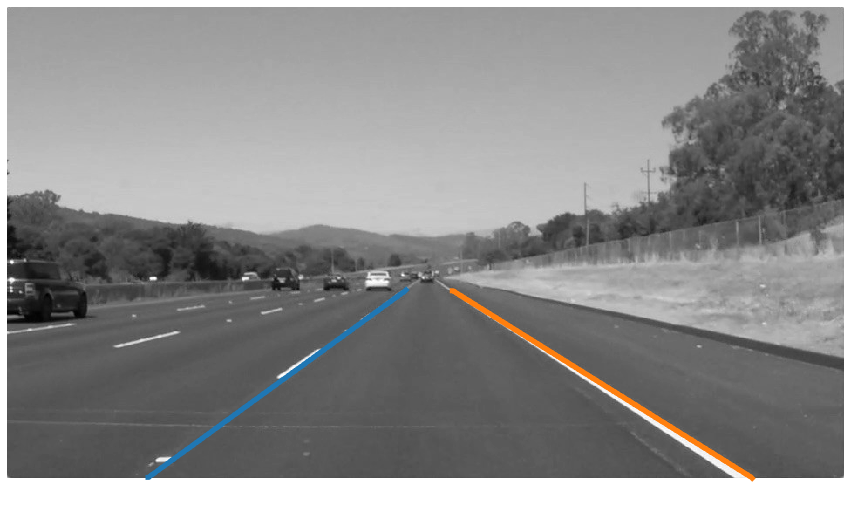

In [11]:

from edge import hough_transform

#   Perform Hough transform on the ROI
acc, rhos, thetas = hough_transform(roi)

#   Coordinates for right lane
xs_right = []
ys_right = []

#   Coordinates for left lane
xs_left = []
ys_left = []

for i in range(20):
    idx = np.argmax(acc)
    r_idx = idx // acc.shape[1]
    t_idx = idx % acc.shape[1]
    acc[r_idx, t_idx] = 0   #   zero out the max value in accumulator

    rho = rhos[r_idx]
    theta = thetas[t_idx]

    #   Transform a point in Hough space to a line in xy-space.
    a = -(np.cos(theta) / np.sin(theta))    #   slope of the line
    b = (rho/np.sin(theta)) #   y-intersect of the line

    #   Break if both right and left lanes are detected
    if (xs_right and xs_left):
        break

    if (a<0):   #   Left lane
        if (xs_left):
            continue
        xs = xs_left
        ys = ys_left
    
    else:   #   Right lane
        if (xs_right):
            continue
        xs = xs_right
        ys = ys_right
    
    for x in range(img2.shape[1]):
        y = a * x + b
        if (y > img2.shape[0] * 0.6 and y < img2.shape[0]):
            xs.append(x)
            ys.append(int(round(y)))

plt.imshow(img2)
plt.plot(xs_left, ys_left, linewidth=5.0)
plt.plot(xs_right, ys_right, linewidth=5.0)
plt.axis('off')
plt.show()